<a href="https://colab.research.google.com/github/eszterurban/NLP/blob/main/beadand%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")

from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words("english")

from nltk.corpus import wordnet as wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import csv
import pandas as pd

file_path = 'labeled_lyrics_cleaned.csv'
rows = []


with open(file_path, 'r', encoding='utf-8', errors='ignore') as csvfile:
    csvreader = csv.reader(csvfile)

    for row in csvreader:
        rows.append(row)

dataset = pd.DataFrame(rows[1:], columns=rows[0])

In [ ]:
dataset.head()

,,artist,seq,song,label
0,0,Elijah Blake,"No, no\nI ain't ever trapped out the bando\nBu...",Everyday,0.626
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.63
2,2,Elijah Blake,She don't live on planet Earth no more\nShe fo...,The Otherside,0.24
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371


In [ ]:
def map_to_sentiment_label(label):
    if label < 0.2:
        return "Very Negative"
    elif label < 0.4:
        return "Negative"
    elif label < 0.6:
        return "Neutral"
    elif label < 0.8:
        return "Positive"
    else:
        return "Very Positive"

In [ ]:
example_labels = dataset["label"].astype(float).tolist()
mapped_sentiment_labels = [map_to_sentiment_label(label) for label in example_labels]

In [ ]:
dataset["label"] = mapped_sentiment_labels

In [ ]:
dataset

,,artist,seq,song,label
0,0,Elijah Blake,"No, no\nI ain't ever trapped out the bando\nBu...",Everyday,Positive
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,Positive
2,2,Elijah Blake,She don't live on planet Earth no more\nShe fo...,The Otherside,Negative
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,Neutral
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,Negative
...,...,...,...,...,...
158348,158348,Adam Green,"And we live on borrowed time,\nBut this headsh...",Friends of Mine,Positive
158349,158349,Adam Green,Frozin in time forever\nCarrying that torch fo...,Frozen in Time,Neutral
158350,158350,Adam Green,Hard to be a girl. \nSo nice to be a boy. \nIn...,Hard to Be a Girl,Positive
158351,158351,Adam Green,"I want to chose to die,\nAnd be buried with a ...",I Wanna Die,Negative


In [ ]:
dataset = dataset.drop(columns=['artist', 'song'])

In [ ]:
dataset.head()

,,seq,label
0,0,"No, no\nI ain't ever trapped out the bando\nBu...",Positive
1,1,"The drinks go down and smoke goes up, I feel m...",Positive
2,2,She don't live on planet Earth no more\nShe fo...,Negative
3,3,"Trippin' off that Grigio, mobbin', lights low\...",Neutral
4,4,"I see a midnight panther, so gallant and so br...",Negative


In [ ]:
lemmatizer = WordNetLemmatizer()
tag_dictionary = {"J": wordnet.ADJ,
                  "N": wordnet.NOUN,
                  "V": wordnet.VERB,
                  "R": wordnet.ADV}

In [ ]:
def tokenize_sentence(sentence):
    return word_tokenize(sentence)

def extract_wnpostag_from_postag(tag):
    return tag_dictionary.get(tag[0].upper(), None)

def lemmatize_tupla_word_postag(_tuple):
    tag = extract_wnpostag_from_postag(_tuple[1])
    return lemmatizer.lemmatize(_tuple[0], tag) if tag is not None else _tuple[0]


def preprocess(sentence):
    lowercase_sentence = sentence.lower()

    tokenized_sentence = tokenize_sentence(lowercase_sentence)

    pos_tagged_words = nltk.pos_tag(tokenized_sentence)

    lemmatized_words = [ lemmatize_tupla_word_postag(ow) for ow in pos_tagged_words ]

    cleaned_words = [ w for w in lemmatized_words if (w.isalpha()) and (w not in STOPWORDS) ]

    return cleaned_words

In [ ]:
dataset = dataset[0:60000]

In [ ]:
dataset["seq"] = dataset["seq"].apply(preprocess)

In [ ]:
dataset.head()

,,seq,label
0,0,"[ai, ever, trap, bando, oh, lord, get, wrong, ...",Positive
1,1,"[drink, go, smoke, go, feel, get, let, go, car...",Positive
2,2,"[live, planet, earth, find, love, venus, word,...",Negative
3,3,"[trippin, grigio, mobbin, light, low, trippin,...",Neutral
4,4,"[see, midnight, panther, gallant, brave, find,...",Negative


In [ ]:
small_train_dataset = dataset[0:48000]
small_eval_dataset = dataset[48000:60000]

In [ ]:
small_train_dataset = small_train_dataset.sample(frac=1)
small_eval_dataset = small_eval_dataset.sample(frac=1)

In [ ]:
small_train_dataset

,,seq,label
3848,3848,"[forget, feel, feeling, alone, lonely, guess, ...",Negative
32892,32892,"[ca, count, one, else, nothin, seem, true, beg...",Negative
30546,30546,"[time, good, never, think, future, would, oh, ...",Neutral
8933,8933,"[dream, white, christmas, like, one, use, know...",Negative
47503,47503,"[bird, prey, bird, prey, fly, high, fly, high,...",Negative
...,...,...,...
20371,20371,"[na, yeah, back, braveheart, taste, like, dadd...",Positive
13588,13588,"[remember, golden, day, use, walk, hand, hand,...",Negative
44346,44346,"[may, familiar, language, sure, would, like, c...",Neutral
46186,46186,"[damn, cold, world, never, think, see, day, ol...",Very Positive


In [ ]:
small_eval_dataset

,,seq,label
56745,56745,"[buried, deep, dig, inside, cover, perfect, sh...",Negative
49016,49016,"[say, want, stay, together, think, oh, red, li...",Negative
57824,57824,"[eagle, soar, cloud, deer, ran, hill, may, wal...",Very Negative
58994,58994,"[get, everything, need, artist, look, back, ge...",Negative
58022,58022,"[child, hop, pray, day, since, little, one, oh...",Negative
...,...,...,...
57334,57334,"[see, understand, help, fear, stand, together,...",Very Negative
48848,48848,"[hate, grow, every, day, every, lie, choose, t...",Neutral
54601,54601,"[feast, well, prepare, table, beast, licking, ...",Negative
53719,53719,"[garrison, starr, beautiful, los, angeles, bri...",Negative


In [ ]:
def dictionary_builder(input_rows, n):
    d = dict()

    for rows in input_rows:
        for token in rows:
            d[token] = d.get(token, 0) + 1

    return {k for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)[:n]}

In [ ]:
dictionary = dictionary_builder(small_train_dataset["seq"].values, 10000)

In [ ]:
lables = small_train_dataset["label"].unique()

In [ ]:
def frequency(df):
    freq = {lable: {} for lable in lables}

    for idx in range(df.shape[0]):
        tokens =df.iloc[idx, 1]
        lable = df.iloc[idx, 2]

        for token in tokens:
            if token in dictionary:
                freq[lable][token] = freq[lable].get(token, 0) + 1

    return freq

In [ ]:
frequency_table = frequency(small_train_dataset)

In [ ]:
def extract_features(frequency_table, tweet_tokens):
    label_frequencies = {cimke: 0 for cimke in lables}

    for t in tweet_tokens:
        for lable in lables:
            label_frequencies[lable] += frequency_table[lable].get(t, 0)

    return pd.Series(label_frequencies)

In [ ]:
X_train = small_train_dataset["seq"].apply(lambda tokens: extract_features(frequency_table, tokens))
X_train
y_train = small_train_dataset["label"].values
y_train

array(['Negative', 'Negative', 'Neutral', ..., 'Neutral', 'Very Positive',
       'Negative'], dtype=object)

In [ ]:
model = MultinomialNB(alpha=1)

In [ ]:
model.fit(X_train.values,y_train)

MultinomialNB(alpha=1)

In [ ]:
X_eval = small_eval_dataset["seq"].apply(lambda tokens: extract_features(frequency_table, tokens))
y_eval = small_eval_dataset["label"].values

In [ ]:
eval_pred = model.predict(X_eval)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


Text(50.722222222222214, 0.5, 'Real lable')

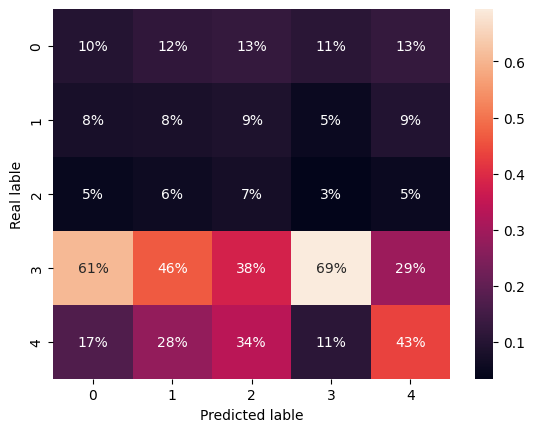

In [ ]:
matrix = confusion_matrix(y_eval, eval_pred, normalize="true")

sns.heatmap(matrix.T, annot=True, fmt=".0%")
plt.xlabel("Predicted lable")
plt.ylabel("Real lable")